# from tutorial

In [32]:
import xarray as xr
from pathlib import Path

In [33]:
data_2d_z2 =  '/g/data/qx55/germany_node/d3hp003.zarr/P1D_mean_z10_atm.zarr'
ds_2 = xr.open_zarr(data_2d_z2)
ds_2

<xarray.Dataset> Size: 6TB
Dimensions:        (time: 425, cell: 12582912, crs: 1, pressure: 30,
                    soil_level: 5, pressure_rva: 3)
Coordinates:
  * crs            (crs) float32 4B nan
  * pressure       (pressure) int64 240B 5 10 20 50 ... 92500 95000 97500 100000
  * pressure_rva   (pressure_rva) int64 24B 16 18 23
  * soil_level     (soil_level) int64 40B 0 0 0 2 6
  * time           (time) datetime64[ns] 3kB 2020-01-02 ... 2021-03-01
Dimensions without coordinates: cell
Data variables: (12/58)
    clivi          (time, cell) float32 21GB dask.array<chunksize=(4, 262144), meta=np.ndarray>
    clt            (time, cell) float32 21GB dask.array<chunksize=(4, 262144), meta=np.ndarray>
    clwvi          (time, cell) float32 21GB dask.array<chunksize=(4, 262144), meta=np.ndarray>
    egpvi          (time, cell) float32 21GB dask.array<chunksize=(4, 262144), meta=np.ndarray>
    einvi          (time, cell) float32 21GB dask.array<chunksize=(4, 262144), meta=np.ndarray>
    ekhvi          (time, cell) float32 21GB dask.array<chunksize=(4, 262144), meta=np.ndarray>
    ...             ...
    ua             (time, pressure, cell) float32 642GB dask.array<chunksize=(4, 1, 262144), meta=np.ndarray>
    uas            (time, cell) float32 21GB dask.array<chunksize=(4, 262144), meta=np.ndarray>
    va             (time, pressure, cell) float32 642GB dask.array<chunksize=(4, 1, 262144), meta=np.ndarray>
    vas            (time, cell) float32 21GB dask.array<chunksize=(4, 262144), meta=np.ndarray>
    wa             (time, pressure, cell) float32 642GB dask.array<chunksize=(4, 1, 262144), meta=np.ndarray>
    zg             (time, pressure, cell) float32 642GB dask.array<chunksize=(4, 1, 262144), meta=np.ndarray>
Attributes:
    hiopy::parent:  P1D_mean_z11_atm

In [34]:
pr = ds_2['pr']  # (time, cell)
pr_day = pr.isel(time=2) * 86400  # Convert from kg m-2 s-1 to mm/day

In [35]:
ds_2.pr

<xarray.DataArray 'pr' (time: 425, cell: 12582912)> Size: 21GB
dask.array<open_dataset-pr, shape=(425, 12582912), dtype=float32, chunksize=(4, 262144), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 3kB 2020-01-02 2020-01-03 ... 2021-03-01
Dimensions without coordinates: cell
Attributes:
    grid_mapping:        crs
    hiopy::time_method:  mean
    hiopy::nnn:          4
    hiopy::enable:       True
    standard_name:       pr
    units:               kg m-2 s-1
    short_name:          
    long_name:           precipitation flux

In [36]:
ds_2.time


<xarray.DataArray 'time' (time: 425)> Size: 3kB
array(['2020-01-02T00:00:00.000000000', '2020-01-03T00:00:00.000000000',
       '2020-01-04T00:00:00.000000000', ..., '2021-02-27T00:00:00.000000000',
       '2021-02-28T00:00:00.000000000', '2021-03-01T00:00:00.000000000'],
      shape=(425,), dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 3kB 2020-01-02 2020-01-03 ... 2021-03-01
Attributes:
    axis:     T

In [37]:
ds_2.pr.mean("cell").values[:40]


array([3.0682048e-05, 3.3156521e-05, 3.3638255e-05, 3.4574430e-05,
       3.4316279e-05, 3.3965847e-05, 3.4164095e-05, 3.3561966e-05,
       3.5413930e-05, 3.6217334e-05, 3.7364356e-05, 3.7755570e-05,
       3.5050918e-05, 3.3275206e-05, 3.4863548e-05, 3.3060038e-05,
       3.1355845e-05, 3.2232747e-05, 3.4202094e-05, 3.5000976e-05,
       3.5072848e-05, 3.5048553e-05, 3.4478504e-05, 3.5132321e-05,
       3.4628763e-05, 3.4611709e-05, 3.3884393e-05, 3.3369397e-05,
       3.5815556e-05, 3.5790130e-05, 3.5865334e-05, 3.4106841e-05,
       3.4216890e-05, 3.3696753e-05, 3.1728803e-05, 3.3147520e-05,
       3.4803292e-05, 3.3334614e-05, 3.4969107e-05, 3.4898196e-05],
      dtype=float32)

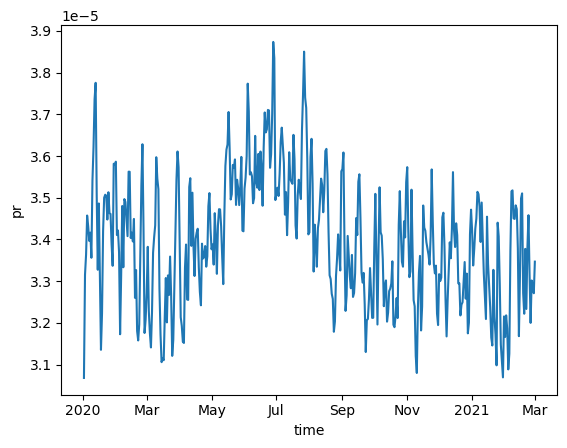

In [38]:
ds_2.pr.mean("cell").plot()


# at different duration

In [45]:
import matplotlib.pyplot as plt
import easygems.healpix as egh
import cartopy.crs as ccrs

In [46]:

data_2d_z2 = '/g/data/qx55/germany_node/d3hp003.zarr/PT1H_point_z10_atm.zarr/'
ds_2 = xr.open_zarr(data_2d_z2)

data_2d_z3 = '/g/data/qx55/germany_node/d3hp003.zarr/P1D_mean_z10_atm.zarr'
ds_3 = xr.open_zarr(data_2d_z3)


In [60]:
ds_dict = {2:ds_2.pr, 3:ds_3.pr}

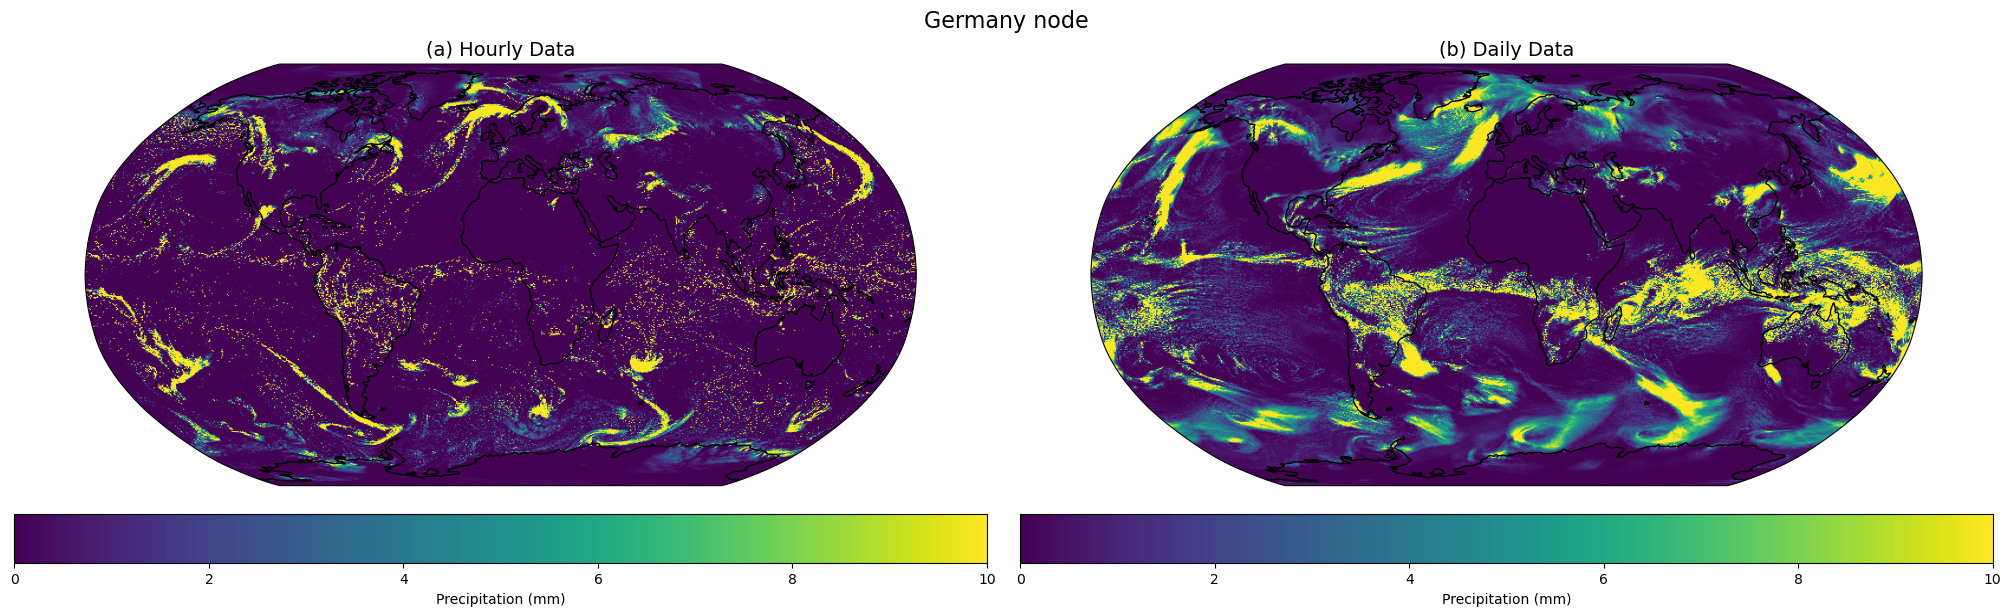

In [79]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Define projection (Robinson with central longitude at 0)
projection = ccrs.Robinson(central_longitude=0)

# Create a 1x2 grid of subplots with the specified projection
fig, axes = plt.subplots(1, 2, figsize=(20, 6), subplot_kw={'projection': projection}, layout='constrained')

# Overall title for the figure
plt.suptitle('Germany node', fontsize=16)

# Loop over the axes and dataset items
for ax, (name, da) in zip(axes.flatten(), ds_dict.items()):
    # Select data at time step 20 and multiply by 86400
    data = da.isel(time=20) * 86400
    
    # Plot the data using healpix_show (assuming it returns an imshow object)
    ax.set_global()
    im = egh.healpix_show(data.values, ax=ax, vmin=0, vmax=10)
    
    # Add coastlines to the plot
    ax.coastlines()
    
    # Set the title for each subplot
    if ax == axes[0]:  # First subplot (hourly data)
        ax.set_title('(a) Hourly Data', fontsize=14)
    elif ax == axes[1]:  # Second subplot (daily data)
        ax.set_title('(b) Daily Data', fontsize=14)
    
    # Add the colorbar linked to the `imshow` object
    cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.05)
    cbar.set_label('Precipitation (mm)', fontsize=10)

# Display the figure
plt.show()


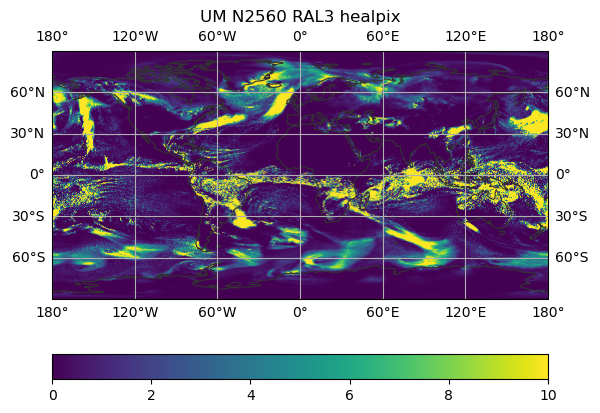

In [81]:
# Plotting lat/lon values over the grid
projection=ccrs.PlateCarree(central_longitude=0.0)

ax = egh.create_geoaxis(add_coastlines=True,projection=projection)
im = egh.healpix_show(data.values, ax=ax, add_coastlines=True, vmin=0, vmax=10)
ax.set_title(f'UM N2560 RAL3 healpix')
ax.gridlines(draw_labels=True)
fig=ax.get_figure()
fig.colorbar(im,orientation='horizontal')

# crop australia

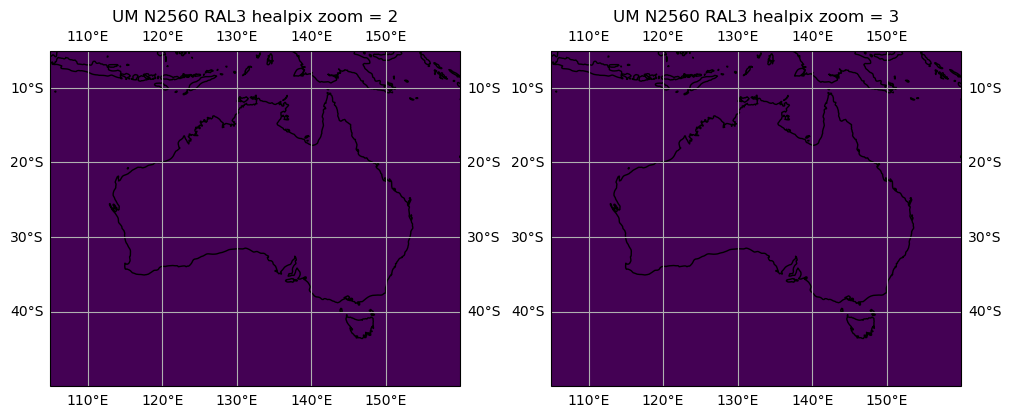

In [86]:
# Plotting the above, over Australia with all zoom levels.

# Note - we still have to use the egh wrapper functions to plot the healpix gridded data
# onto a lat/lon grid
projection = ccrs.PlateCarree(central_longitude=0)

fig, axes = plt.subplots(1, 2, figsize=(10, 9), subplot_kw={'projection': projection}, layout='constrained')

for ax, (name, da) in zip(axes.flatten(), ds_dict.items()):
    data = da.isel(time=100)
    ax.set_extent([105, 160,-50, -5], crs=ccrs.PlateCarree())
    im = egh.healpix_show(data.values,ax=ax, vmin=0, vmax=10)
    ax.coastlines()
    ax.set_title(f'UM N2560 RAL3 healpix zoom = {name}')
    ax.gridlines(draw_labels=True)

In [87]:
# Define the latitude and longitude range for cropping
lat_min, lat_max = -50, -5
lon_min, lon_max = 105, 160

# Crop the data
cropped_data = da.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

# Sum across the time dimension
summed_data = cropped_data.sum(dim='time')

# Plot the summed data
fig, ax = plt.subplots(figsize=(10, 9), subplot_kw={'projection': projection})
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
im = egh.healpix_show(summed_data.values, ax=ax, vmin=0, vmax=10)
ax.coastlines()
ax.set_title(f'Summed Data from {lat_min} to {lat_max} lat and {lon_min} to {lon_max} lon')


KeyError: "'lat' is not a valid dimension or coordinate for Dataset with dimensions FrozenMappingWarningOnValuesAccess({'time': 425, 'cell': 12582912})"